In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [3]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [4]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [5]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.31608242790179514, 0.6200168637413923],
 'diameter': 57.93413822097722,
 'confidence': 0.9759553670883179,
 'timestamp': 499354.925189,
 'sphere': {'center': [2.3874575255021537,
   -1.3851808367675627,
   43.19029465742118],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [111.50907434965274, 86.84527544149502],
  'axes': [162.97036866503038, 162.97036866503038],
  'angle': 0.0},
 'circle_3d': {'center': [-3.9399757538583464,
   -2.7093501395329356,
   35.053331848556],
  'normal': [-0.6088575511863635, -0.1274182505673712, -0.7829796113473807],
  'radius': 3.1860158841678823},
 'diameter_3d': 6.372031768335765,
 'ellipse': {'center': [60.68782615714467, 72.95676216165266],
  'axes': [44.278232698747686, 57.93413822097722],
  'angle': 14.252830984706293},
 'location': [60.68782615714467, 72.95676216165266],
 'model_confidence': 1.0,
 'theta': 1.6985619021957534,
 'phi': -2.2317387496

Text(0.5, 0, 'Pupil timestamp (s)')

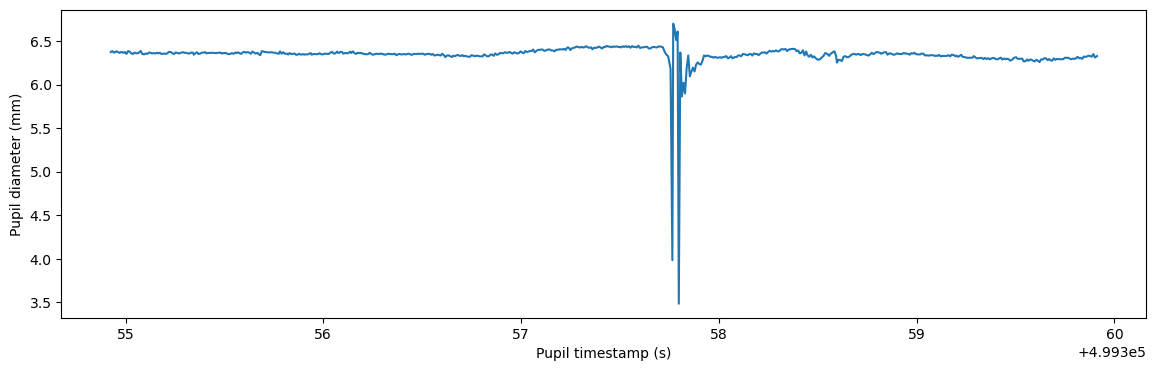

In [6]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')